In [1]:
import math
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
from collections import Counter
from matplotlib.pyplot import figure

## Load & Preview Davis Club

In [2]:
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

#### Project Bipartite into Unipartite Women Network

In [3]:
W = bipartite.projected_graph(G, women)
print()
print("Degrees, Attendee")
for w in women:
    print(f"{W.degree(w)} {w}")


Degrees, Attendee
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


#### Project Bipartite into Unipartite Clubs Network

In [4]:
E = bipartite.projected_graph(G, clubs)
print()
print("Degrees, Club")
for e in clubs:
    print(f"{E.degree(e)} {e}")


Degrees, Club
8 E1
8 E2
8 E3
8 E4
8 E5
13 E6
13 E7
13 E8
13 E9
8 E10
8 E11
8 E12
8 E13
8 E14


In [5]:
print(G.nodes(data=True))

[('Evelyn Jefferson', {'bipartite': 0}), ('Laura Mandeville', {'bipartite': 0}), ('Theresa Anderson', {'bipartite': 0}), ('Brenda Rogers', {'bipartite': 0}), ('Charlotte McDowd', {'bipartite': 0}), ('Frances Anderson', {'bipartite': 0}), ('Eleanor Nye', {'bipartite': 0}), ('Pearl Oglethorpe', {'bipartite': 0}), ('Ruth DeSand', {'bipartite': 0}), ('Verne Sanderson', {'bipartite': 0}), ('Myra Liddel', {'bipartite': 0}), ('Katherina Rogers', {'bipartite': 0}), ('Sylvia Avondale', {'bipartite': 0}), ('Nora Fayette', {'bipartite': 0}), ('Helen Lloyd', {'bipartite': 0}), ('Dorothy Murchison', {'bipartite': 0}), ('Olivia Carleton', {'bipartite': 0}), ('Flora Price', {'bipartite': 0}), ('E1', {'bipartite': 1}), ('E2', {'bipartite': 1}), ('E3', {'bipartite': 1}), ('E4', {'bipartite': 1}), ('E5', {'bipartite': 1}), ('E6', {'bipartite': 1}), ('E7', {'bipartite': 1}), ('E8', {'bipartite': 1}), ('E9', {'bipartite': 1}), ('E10', {'bipartite': 1}), ('E11', {'bipartite': 1}), ('E12', {'bipartite': 1})

## Bipartite Analysis

In [6]:
women_event_num, events_size = nx.bipartite.degrees(G, clubs)

#### Number of Events Each Women Attended

In [7]:
print(women_event_num)

[('Olivia Carleton', 2), ('Sylvia Avondale', 7), ('Helen Lloyd', 5), ('Laura Mandeville', 7), ('Flora Price', 2), ('Charlotte McDowd', 4), ('Pearl Oglethorpe', 3), ('Ruth DeSand', 4), ('Evelyn Jefferson', 8), ('Brenda Rogers', 7), ('Katherina Rogers', 6), ('Nora Fayette', 8), ('Eleanor Nye', 4), ('Theresa Anderson', 8), ('Myra Liddel', 4), ('Frances Anderson', 4), ('Dorothy Murchison', 2), ('Verne Sanderson', 4)]


Here we can see Evelyn Jefferson, Nora Fayette and Theresa Anderson are the most social of the group, while Flora Price and Olivia Carleton attend events less. Will this be reflected in our centrality measures and visuals?

#### Number of Attendees for Each Event

In [8]:
print(events_size)

[('E3', 6), ('E7', 10), ('E14', 3), ('E5', 8), ('E1', 3), ('E4', 4), ('E2', 3), ('E10', 5), ('E12', 6), ('E8', 14), ('E11', 4), ('E9', 12), ('E6', 8), ('E13', 3)]


Here we see E8 and E9 are the most attended events, so we may hypothesize that in the unipartite projection of events we would expect to see high betweenness centrality, among other centrality measures.

In [9]:
women_event_num_dist = Counter(sorted(dict(women_event_num).values()))
events_size_dist = Counter(sorted(dict(events_size).values()))

#### Frequency of Events Attended Per Women

For clarity, the below can be read as 3 events had 2 attendees, 1 event had 3 attendees, 6 events had 4 attendees, and so on.

Text(0, 0.5, 'Frequency')

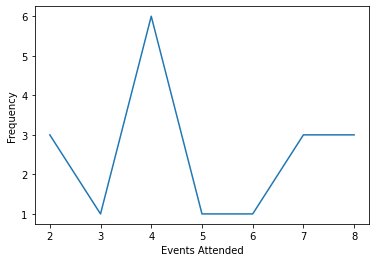

In [10]:
plt.plot(women_event_num_dist.keys(), women_event_num_dist.values())
plt.xlabel("Events Attended")
plt.ylabel("Frequency")

Appears the median number of events attended by women is 4, which may indicate high attendance of events among a few women may not be as essential to connecting the women as in other networks.

#### Frequency of Event Size

For clarity, the below can be read as 4 events with 2 attendees, 2 events with 4 attendees, 1 event with 5 attendees, and so on.

Text(0, 0.5, 'Frequency')

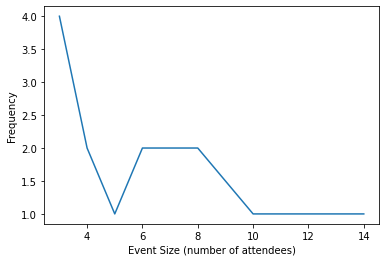

In [11]:
plt.plot(events_size_dist.keys(), events_size_dist.values())
plt.xlabel("Event Size (number of attendees)")
plt.ylabel("Frequency")

Understanding that small events (e.g. events with 3 attendees) make up a significant portion of the overall events in the network is important for gaining an intuition for how critical one event is in the network. Similarly with the attendees, we may conclude no particular event is essential for connecting the women, but that should be further explored with more rigorous analysis techniques.

In [12]:
popularity_dist = Counter(sorted(dict(G.degree).values()))

Text(0, 0.5, 'Frequency')

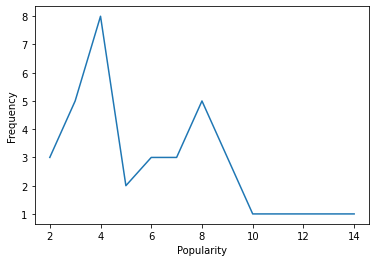

In [13]:
plt.plot(popularity_dist.keys(), popularity_dist.values())
plt.xlabel("Popularity")
plt.ylabel("Frequency")

Here we see the number of degrees for all the nodes in the network, both women and events. At first glance, drawing conclusions from this plot appears difficult, but nevertheless, we can note that no extreme outliers exist.

#### Visulize Bipartite Network

We update the NetworkX documentation example found [here](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html) to highlight the node types (women vs events) by color.

In [45]:
from matplotlib.pyplot import figure

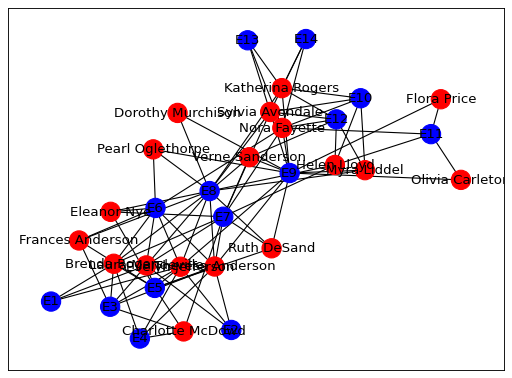

In [46]:
pos = nx.spring_layout(G, seed=648)
colors = {0: 'r', 1: 'b'}
figure(figsize=(8, 6), dpi=80)
nx.draw_networkx(G, pos=pos, node_color=[colors[G.nodes[node]['bipartite']] for node in G])
plt.show()

As we might have expected, we can see there are slight clusters of women (red nodes) around certain social events (blue nodes). There also appears to be a few women that act as bridges between cliques.

## Unipartite (Projection) Analysis: Women

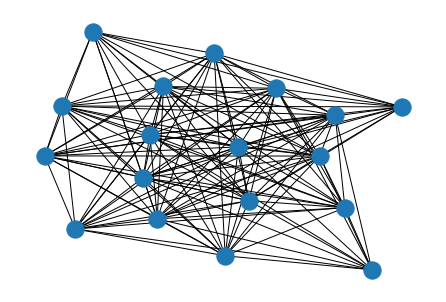

In [15]:
pos = nx.spring_layout(W, seed=648)
nx.draw(W, pos=pos)

Let's add weights based on the number of edges between nodes and reflect them in the plot via edge width and color. According to Tsvetovat and Kouznetsov, it is best to take the log of the edge values since they can vary widely and doing so narrows the numeric range.

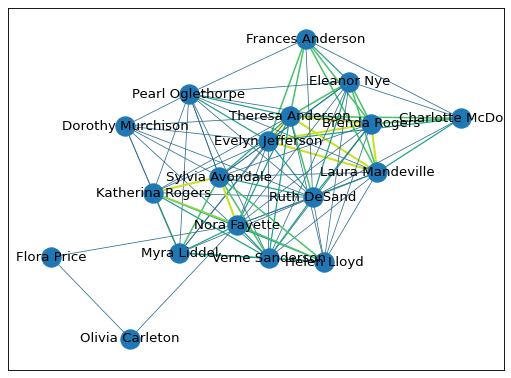

In [16]:
Ww = bipartite.weighted_projected_graph(G, women, ratio=False)
wwnet = (Ww.subgraph(c) for c in nx.connected_components(Ww))
weights = [math.log(edata['weight']) for f, t, edata in Ww.edges(data=True)]
figure(figsize=(8, 6), dpi=80)
nx.draw_networkx(Ww, width=weights, edge_color=weights)

In [17]:
def trim_edges(g, weight=1):
    """This function is sourced from chapter 5 of Social Network Analysis for Startups"""
    g2 = nx.Graph()
    for f, to, edata in g.edges(data=True):
        print(f, to, edata)
        if edata['weight'] > weight:
            g2.add_edge(f, to, attr_dict = edata)
    return g2

(array([44.,  0.,  0., 49.,  0., 22.,  0., 15.,  1.,  8.]),
 array([0.        , 0.19459101, 0.38918203, 0.58377304, 0.77836406,
        0.97295507, 1.16754609, 1.3621371 , 1.55672812, 1.75131913,
        1.94591015]),
 <BarContainer object of 10 artists>)

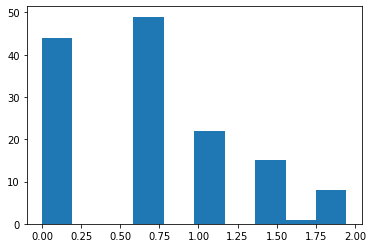

In [18]:
plt.hist(weights)

Now we trim the network in order to highlight the most meaningful clusters. The weight was selected via a heuristic method, mainly based on the appearance of it in *Social Network Analysis for Startups*.

In [19]:
wwnet_trim = trim_edges(Ww, weight=math.exp(.9))
weights = [math.log(edata['attr_dict']['weight']) for f, t, edata in wwnet_trim.edges(data=True)]

Evelyn Jefferson Sylvia Avondale {'weight': 2}
Evelyn Jefferson Laura Mandeville {'weight': 6}
Evelyn Jefferson Charlotte McDowd {'weight': 3}
Evelyn Jefferson Pearl Oglethorpe {'weight': 3}
Evelyn Jefferson Flora Price {'weight': 1}
Evelyn Jefferson Ruth DeSand {'weight': 3}
Evelyn Jefferson Brenda Rogers {'weight': 6}
Evelyn Jefferson Frances Anderson {'weight': 4}
Evelyn Jefferson Theresa Anderson {'weight': 7}
Evelyn Jefferson Olivia Carleton {'weight': 1}
Evelyn Jefferson Helen Lloyd {'weight': 1}
Evelyn Jefferson Katherina Rogers {'weight': 2}
Evelyn Jefferson Nora Fayette {'weight': 2}
Evelyn Jefferson Eleanor Nye {'weight': 3}
Evelyn Jefferson Myra Liddel {'weight': 2}
Evelyn Jefferson Dorothy Murchison {'weight': 2}
Evelyn Jefferson Verne Sanderson {'weight': 2}
Laura Mandeville Sylvia Avondale {'weight': 2}
Laura Mandeville Charlotte McDowd {'weight': 3}
Laura Mandeville Pearl Oglethorpe {'weight': 2}
Laura Mandeville Ruth DeSand {'weight': 3}
Laura Mandeville Brenda Rogers {

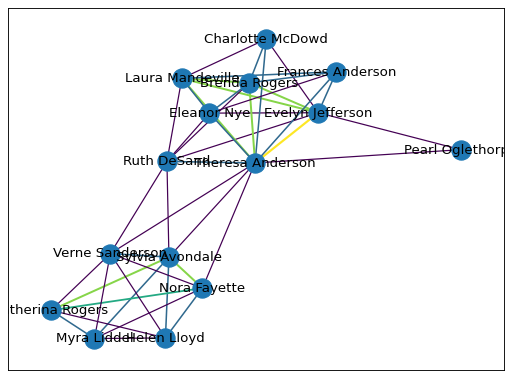

In [20]:
figure(figsize=(8, 6), dpi=80)
nx.draw_networkx(wwnet_trim, width=weights, edge_color=weights)

We can see Flora Price and Olivia Carleton were pruned from the network.

In [21]:
between_centality_women = Counter(nx.betweenness_centrality(W, normalized=True))

In [22]:
between_centality_women.most_common()

[('Evelyn Jefferson', 0.010122230710466005),
 ('Theresa Anderson', 0.010122230710466005),
 ('Ruth DeSand', 0.010122230710466005),
 ('Verne Sanderson', 0.010122230710466005),
 ('Sylvia Avondale', 0.010122230710466005),
 ('Nora Fayette', 0.010122230710466005),
 ('Helen Lloyd', 0.010122230710466005),
 ('Pearl Oglethorpe', 0.0053475935828877),
 ('Myra Liddel', 0.0053475935828877),
 ('Katherina Rogers', 0.0053475935828877),
 ('Dorothy Murchison', 0.0053475935828877),
 ('Laura Mandeville', 0.0026737967914438505),
 ('Brenda Rogers', 0.0026737967914438505),
 ('Frances Anderson', 0.0026737967914438505),
 ('Eleanor Nye', 0.0026737967914438505),
 ('Charlotte McDowd', 0.0),
 ('Olivia Carleton', 0.0),
 ('Flora Price', 0.0)]

In [23]:
degree_centrality_women = Counter(nx.degree_centrality(W))

In [24]:
degree_centrality_women.most_common()

[('Evelyn Jefferson', 1.0),
 ('Theresa Anderson', 1.0),
 ('Ruth DeSand', 1.0),
 ('Verne Sanderson', 1.0),
 ('Sylvia Avondale', 1.0),
 ('Nora Fayette', 1.0),
 ('Helen Lloyd', 1.0),
 ('Pearl Oglethorpe', 0.9411764705882353),
 ('Myra Liddel', 0.9411764705882353),
 ('Katherina Rogers', 0.9411764705882353),
 ('Dorothy Murchison', 0.9411764705882353),
 ('Laura Mandeville', 0.8823529411764706),
 ('Brenda Rogers', 0.8823529411764706),
 ('Frances Anderson', 0.8823529411764706),
 ('Eleanor Nye', 0.8823529411764706),
 ('Olivia Carleton', 0.7058823529411764),
 ('Flora Price', 0.7058823529411764),
 ('Charlotte McDowd', 0.6470588235294118)]

In [25]:
eigen_centality_women = Counter(nx.eigenvector_centrality(W))

In [26]:
eigen_centality_women.most_common()

[('Evelyn Jefferson', 0.2535242050574115),
 ('Theresa Anderson', 0.2535242050574115),
 ('Ruth DeSand', 0.2535242050574115),
 ('Verne Sanderson', 0.2535242050574115),
 ('Sylvia Avondale', 0.2535242050574115),
 ('Nora Fayette', 0.2535242050574115),
 ('Helen Lloyd', 0.2535242050574115),
 ('Pearl Oglethorpe', 0.24315691598127517),
 ('Myra Liddel', 0.24315691598127517),
 ('Katherina Rogers', 0.24315691598127517),
 ('Dorothy Murchison', 0.24315691598127517),
 ('Laura Mandeville', 0.2309732711453131),
 ('Brenda Rogers', 0.2309732711453131),
 ('Frances Anderson', 0.2309732711453131),
 ('Eleanor Nye', 0.2309732711453131),
 ('Olivia Carleton', 0.1876393705421449),
 ('Flora Price', 0.1876393705421449),
 ('Charlotte McDowd', 0.1725268799427599)]

In [27]:
Counter(nx.triangles(W)).most_common()

[('Evelyn Jefferson', 122),
 ('Theresa Anderson', 122),
 ('Ruth DeSand', 122),
 ('Verne Sanderson', 122),
 ('Sylvia Avondale', 122),
 ('Nora Fayette', 122),
 ('Helen Lloyd', 122),
 ('Pearl Oglethorpe', 112),
 ('Myra Liddel', 112),
 ('Katherina Rogers', 112),
 ('Dorothy Murchison', 112),
 ('Laura Mandeville', 101),
 ('Brenda Rogers', 101),
 ('Frances Anderson', 101),
 ('Eleanor Nye', 101),
 ('Olivia Carleton', 66),
 ('Flora Price', 66),
 ('Charlotte McDowd', 55)]

As expected, Evelyn Jefferson, Nora Fayette and Theresa Anderson dominate the centrality measures. Also, less obvious women appear equally high in some measures. Nevertheless, the three women previously mentioned are most likely the ones you would like to attend your events, especially all those with top betweenness centrality measures, in order for your club to become a success.

## Unipartite (Projection) Analysis: Events

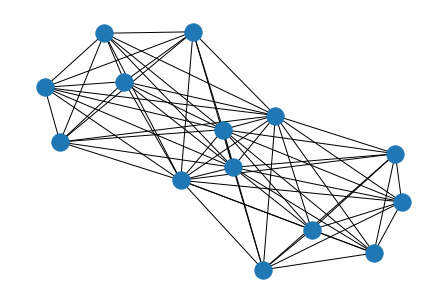

In [28]:
pos = nx.spring_layout(E, seed=648)
nx.draw(E, pos=pos)

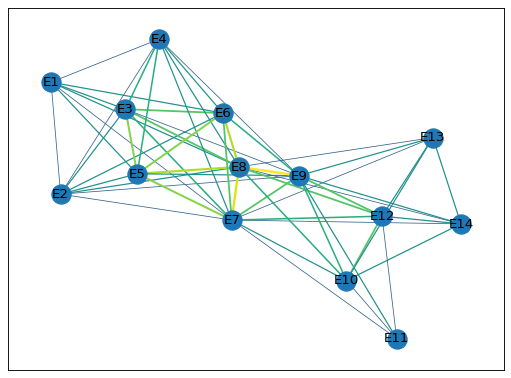

In [29]:
Ew = bipartite.weighted_projected_graph(G, clubs)
ewnet = (Ew.subgraph(c) for c in nx.connected_components(Ew))
weights = [math.log(edata['weight']) for f, t, edata in Ew.edges(data=True)]
figure(figsize=(8, 6), dpi=80)
nx.draw_networkx(Ew, width=weights, edge_color=weights)

In [30]:
between_centality_events = Counter(nx.betweenness_centrality(E, normalized=True))

In [43]:
nx.betweenness_centrality(E)

{'E1': 0.0,
 'E2': 0.0,
 'E3': 0.0,
 'E4': 0.0,
 'E5': 0.0,
 'E6': 0.08012820512820512,
 'E7': 0.08012820512820512,
 'E8': 0.08012820512820512,
 'E9': 0.08012820512820512,
 'E10': 0.0,
 'E11': 0.0,
 'E12': 0.0,
 'E13': 0.0,
 'E14': 0.0}

In [40]:
between_centality_events

Counter({'E1': 0.0,
         'E2': 0.0,
         'E3': 0.0,
         'E4': 0.0,
         'E5': 0.0,
         'E6': 0.08012820512820512,
         'E7': 0.08012820512820512,
         'E8': 0.08012820512820512,
         'E9': 0.08012820512820512,
         'E10': 0.0,
         'E11': 0.0,
         'E12': 0.0,
         'E13': 0.0,
         'E14': 0.0})

In [31]:
between_centality_events.most_common()

[('E6', 0.08012820512820512),
 ('E7', 0.08012820512820512),
 ('E8', 0.08012820512820512),
 ('E9', 0.08012820512820512),
 ('E1', 0.0),
 ('E2', 0.0),
 ('E3', 0.0),
 ('E4', 0.0),
 ('E5', 0.0),
 ('E10', 0.0),
 ('E11', 0.0),
 ('E12', 0.0),
 ('E13', 0.0),
 ('E14', 0.0)]

In [32]:
degree_centrality_events = Counter(nx.degree_centrality(E))

In [33]:
degree_centrality_events.most_common()

[('E6', 1.0),
 ('E7', 1.0),
 ('E8', 1.0),
 ('E9', 1.0),
 ('E1', 0.6153846153846154),
 ('E2', 0.6153846153846154),
 ('E3', 0.6153846153846154),
 ('E4', 0.6153846153846154),
 ('E5', 0.6153846153846154),
 ('E10', 0.6153846153846154),
 ('E11', 0.6153846153846154),
 ('E12', 0.6153846153846154),
 ('E13', 0.6153846153846154),
 ('E14', 0.6153846153846154)]

In [34]:
eigen_centality_events = Counter(nx.eigenvector_centrality(E))

In [35]:
eigen_centality_events.most_common()

[('E6', 0.3393355092231299),
 ('E7', 0.3393355092231299),
 ('E8', 0.3393355092231299),
 ('E9', 0.3393355092231299),
 ('E1', 0.23225108153055318),
 ('E2', 0.23225108153055318),
 ('E3', 0.23225108153055318),
 ('E4', 0.23225108153055318),
 ('E5', 0.23225108153055318),
 ('E10', 0.23225108153055316),
 ('E11', 0.23225108153055316),
 ('E12', 0.23225108153055316),
 ('E13', 0.23225108153055316),
 ('E14', 0.23225108153055316)]

In [36]:
Counter(nx.triangles(E)).most_common()

[('E6', 53),
 ('E7', 53),
 ('E8', 53),
 ('E9', 53),
 ('E1', 28),
 ('E2', 28),
 ('E3', 28),
 ('E4', 28),
 ('E5', 28),
 ('E10', 28),
 ('E11', 28),
 ('E12', 28),
 ('E13', 28),
 ('E14', 28)]

E6-E9 are the events that dominate the centrality measures and therefore are the ones, if you were a leader of a club, you would most likely want to partner or cross-promote with in order to generate membership to your club.

### References

*Social Network Analysis for Startups* by Maksim Tsvetovat, Alexander Kouznetsov <br>
Analysis of Two-Mode Networks with Python by Demival Vasques Filho: https://www.youtube.com/watch?v=CcOfX4n4pWg <br>
NetworkX Official Documentation: https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html <br>
Southern Women Data Set, UCIrvine: https://networkdata.ics.uci.edu/netdata/html/davis.html <br>